<div style="text-align: justify">
    
# TITANIC: The shipwreck 
                                                
  RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City.
     
   After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 p.m. ship's time. The collision caused the hull plates to buckle inwards along her starboard (right) side and opened five of her sixteen watertight compartments to the sea; she could only survive four flooding. Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. 
  <br>
   A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived and brought aboard an estimated 705 survivors.
   <br>
   In this analysis the answers for the following questions will be found:
   <br>
   1 - How many people died ?
   <br>
   2 - How many people survived ?
   <br>
   3 - How many woman were in Titanic ?
   <br>
   4 - How many man ?
   <br>
   5 - How many passengers survived from each  class ?
   <br>
   6 - What is the age of the youngest and oldest survivor ?
   <br>
   7 - What is the age of the youngest and oldest victim ?
   <br>
   8 - What percentage of woman survived ? What about man and children ?
   <br>
   9 - How many passengers traveled with family ? How many were alone ?
   <br>
   10- How many passengers embarked in each port ?
   
  <br>
Full article can be found at: https://en.wikipedia.org/wiki/RMS_Titanic

# Data Set

The data set used in this analysis came from kagle. The dataset has information about 891 passengers of the 2208 that embarked in Titanic.

Kagle dataset link: http://www.kaggle.com/c/titanic

# Importing the Data

In [1]:
#import pandas and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic-data-6.csv')


In [2]:
#print the first lines to see if everything was ok
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Clearing
In this section the data will be cleared. We will try to find any inconsistencies and figure out what to do with them, either fix or ignore the inconsistent data.

In [3]:
#Show dataset columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Rename DataSet columns to lower case
titanic.rename(columns=lambda x: x.lower(),inplace = True)
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [5]:
#Show the number os samples
titanic.shape

(891, 12)

In [6]:
#Print info to check missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#Fill the missing values for age with mean
titanic['age'].fillna(titanic['age'].mean(),inplace = True)

We will drop the columns that are not relevant for our analysis, since none of our questions need their information

In [8]:
#Droping the columns
titanic = titanic.drop(['cabin','passengerid','name','fare','ticket'], axis=1)

In [9]:
#Print again to see if the value was properly setted.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [19]:
#show Cold Warm tables based on the correlation between the variables
#The idea here is to check is we have any variable that can explain the target = 'survived'
titanic.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)


,survived,pclass,age,sibsp,parch
survived,1.0,-0.34,-0.07,-0.035,0.082
pclass,-0.34,1.0,-0.33,0.083,0.018
age,-0.07,-0.33,1.0,-0.23,-0.18
sibsp,-0.035,0.083,-0.23,1.0,0.41
parch,0.082,0.018,-0.18,0.41,1.0


As we can see, none of the variables have strong correlation with target
We will try to divide into groups to answer our questions.

In [20]:
#Get the survived passengers
titanic_survived = titanic[titanic['survived']==1]
total_survived = len(titanic_survived)
#Get the dead passengers
titanic_dead = titanic[titanic['survived']==0]
total_died  = len (titanic_dead)
#Get the total of passengers in our dataset
total_passengers = len(titanic)

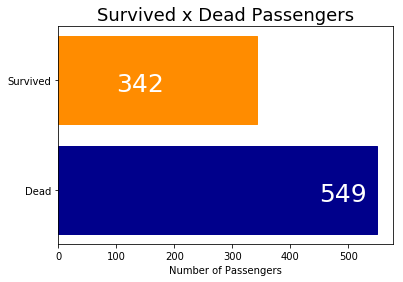

In [21]:
#Plot Horizontal Bar Graph with Survived x Died Passengers

barlist = plt.barh(np.arange(2),[total_died,total_survived])
plt.title('Survived x Dead Passengers',fontsize = 18)
plt.yticks(np.arange(2),['Dead','Survived'])
plt.xlabel("Number of Passengers")
barlist[0].set_color('darkblue')
barlist[1].set_color('darkorange')

plt.text(450, -0.10,str(barlist[0].get_width()), fontsize=25,color='white')
plt.text(100, 0.9,str(barlist[1].get_width()), fontsize=25,color='white')

plt.show()

From the above Graph, we can answer questions 1 and 2.
<br>
1- How many people died ? 549
<br>
2- How many people survived ? 342 
<br>
Let's continue our analysis, for the next questions...

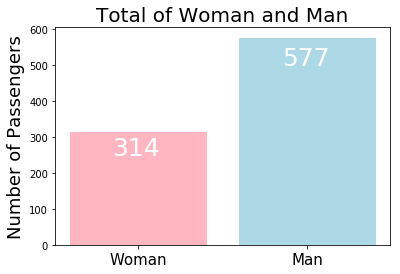

In [22]:
#Get the total number of woman and man
total_woman = len(titanic[titanic['sex']=='female'])
total_man   = len(titanic[titanic['sex']=='male'])

#Plot the graph
barlist = plt.bar(np.arange(2),[total_woman,total_man])
plt.title('Total of Woman and Man',fontsize = 20)
plt.xticks(np.arange(2),['Woman','Man'],fontsize=15)
plt.ylabel("Number of Passengers",fontsize = 18)
barlist[0].set_color('lightpink')
barlist[1].set_color('lightblue')
#print(barlist[0])
plt.text(0.85, 500,str(barlist[1].get_height()), fontsize=25,color='white')
plt.text(-0.15,250,str(barlist[0].get_height()), fontsize=25,color='white')

plt.show()

From the above graph we can now answer questions 3 and 4, as it follows:
<br>
3 - How many woman were in Titanic ? 314
<br>
4 - How many man were in Titanic ?  577
<br>
Let's continue with the analysis,now for each class

In [23]:
#Lets check the classes value
print(titanic['pclass'].unique())

[3 1 2]


In [24]:
#Split the data for the three classes
total_class1_survived = len(titanic_survived[titanic_survived['pclass'] == 1 ]) 
total_class1_died     = len(titanic[titanic['pclass'] == 1 ]) - (total_class1_survived)

total_class2_survived = len(titanic_survived[titanic_survived['pclass'] == 2 ]) 
total_class2_died     = len(titanic[titanic['pclass'] == 2 ]) - (total_class2_survived)

total_class3_survived = len(titanic_survived[titanic_survived['pclass'] == 3 ]) 
total_class3_died     = len(titanic[titanic['pclass'] == 3 ]) - (total_class3_survived)


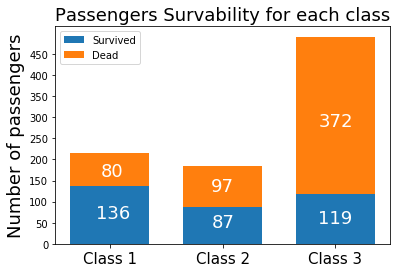

In [25]:
#Plot the stack bar graph

menMeans = (total_class1_survived,total_class2_survived, total_class3_survived)
womenMeans = (total_class1_died, total_class2_died, total_class3_died)
ind = np.arange(3)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

plt.ylabel('Number of passengers' ,fontsize = 18)
plt.title('Passengers Survability for each class', fontsize = 18)
plt.xticks(ind, ('Class 1', 'Class 2', 'Class 3'),fontsize = 15)
plt.yticks(np.arange(0, 500, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Dead'))

plt.text(-0.12, 60,str(total_class1_survived), fontsize=18,color='white')
plt.text(-0.08, 160,str(total_class1_died),     fontsize=18,color='white')

plt.text(0.9, 40,str(total_class2_survived), fontsize=18,color='white')
plt.text(0.9, 125,str(total_class2_died),     fontsize=18,color='white')

plt.text(1.85, 50,  str(total_class3_survived), fontsize=18,color='white')
plt.text(1.85, 280, str(total_class3_died),     fontsize=18,color='white')

plt.show()

From the "Passengers Survability for each class" graph, we can now answer the question 5:
<br>
5. How many passengers survived from each class ? 
<br>
Class 1: 136 survived
<br>
Class 2: 87 survived
<br>
Class 3: 119 survived

We will get the oldest and yougest survived and dead passengers now, to answer the next questions.

In [26]:
youngest_survived = titanic_survived['age'].min()
oldest_survived   = titanic_survived['age'].max()
youngest_dead     = titanic_dead['age'].min()
oldest_dead       = titanic_dead['age'].max()


print("Youngest survivor age: {} year".format(youngest_survived))
print("Oldest survivor age: {} years".format(oldest_survived))
print("Youngest victim age: {} year".format(youngest_dead))
print("Oldest victim age: {} years".format(oldest_dead))

Youngest survivor age: 0.42 year
Oldest survivor age: 80.0 years
Youngest victim age: 1.0 year
Oldest victim age: 74.0 years


With that info we can now answer the question 6 and 7:
<br>
6. What is the age of the youngest and oldest survivor ?
<br>
Youngest age is 0.42 year, a baby around 5 months.
<br>
Oldest   age is 80 years.
<br>
7. What is the age of the youngest and oldest victim ?
<br>
Youngest age is 1 year.
<br>
Oldest   age is 74 years.
<br>
Let's continue with question 8. "What percentage of woman survived ? What about man and children ?

In [27]:
#Filter the DataSet in 3 categories. Young, adult and elder
titanic_young = titanic.query('age <= 18')
titanic_adult = titanic.query('age > 18' and 'age<=60')
titanic_elder = titanic.query('age >  60')

In [28]:
#Show the correlation map again for young passages
#The idea here is check if the correlation became stronger
titanic_young.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,survived,pclass,age,sibsp,parch
survived,1.0,-0.42,-0.24,-0.36,0.098
pclass,-0.42,1.0,-0.069,0.28,-0.1
age,-0.24,-0.069,1.0,-0.34,-0.52
sibsp,-0.36,0.28,-0.34,1.0,0.47
parch,0.098,-0.1,-0.52,0.47,1.0


The correlation became stronger. 
Lets check with graphs if we don't have any insigth 

In [29]:
#Function to plot a pie graph, based on a dataframe.
def plot_binary_pie( dataframe, title, label0, label1,color1,color2,target_column='survived'):
    """
    Function that plots a pie chat graph with two colors.
    Args:
        dataframe (dataframe)  : Data Set of values.
        title     (string)     : Graph Title
        label0    (string)     : The name of itens in target_column with key = 1 
        label1    (string)     : The name of itens in target_column with key = 0
        color1    ()           : Color of one set 
        color2    ()           : Color of the other set
        target_column (string) : The column name to compare the % of values with 0 or 1
    Returns:
       No returns, just plot a pie graph
    """
    survived_count = dict(dataframe[target_column].value_counts())
    labels =[]
    sizes = []
    for key, value in survived_count.items() :
        if key:
            labels.append(label1)
        else:
            labels.append(label0)
    
        sizes.append(value)
    
    # Data to plot
    colors = [color1, color2]
    explode = (0.0, 0.1)  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=120)
 
    plt.axis('equal')
    plt.title(title)
    plt.show()

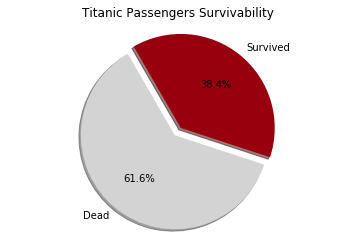

In [30]:
#Set the colors 
colors = ['lightgrey','#99000d']
#Plot a survivability graph with all passangers to have a base parameter 
plot_binary_pie(titanic,"Titanic Passengers Survivability","Dead",'Survived',colors[0],colors[1])

We can see that the chance of a passenger to survive was around 38.4%

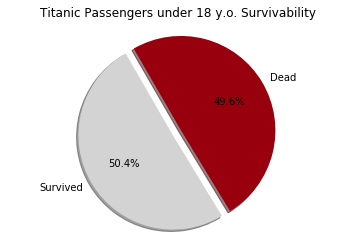

In [31]:
#Plot the pie graph for the younger ones
plot_binary_pie(titanic_young,"Titanic Passengers under 18 y.o. Survivability","Dead",'Survived',colors[0],colors[1])

As we can see that the youngers have a higher chance to survive

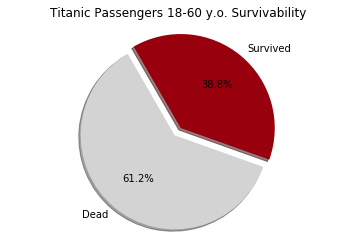

In [32]:
#Plot the graph for adults
plot_binary_pie(titanic_adult,"Titanic Passengers 18-60 y.o. Survivability","Dead",'Survived',colors[0],colors[1])

The survivability for adult is very close to the average
If youngers have a higher chance and adults an equal change, probably
the elder passanges will have a lower chance to survive, lets check

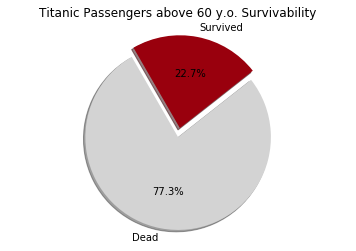

In [33]:
#Plot the graph for elderly passengers
plot_binary_pie(titanic_elder,"Titanic Passengers above 60 y.o. Survivability","Dead",'Survived',colors[0],colors[1])

As expected, elder passengers survivability is the lowest of the three groups.
Lets try to check is we can split the passengers into other groups, to get more insights.

In [34]:
#Split the dataset into three classes
#The expected result is a higher change of survivability for class1. 
#Why ? On average, they probably have more money than passengers with classes 2 and 3.
#They can "buy" the help, priority for boats, rescue etc.

titanic_1class = titanic.query('pclass == 1')
titanic_2class = titanic.query('pclass == 2')
titanic_3class = titanic.query('pclass == 3')

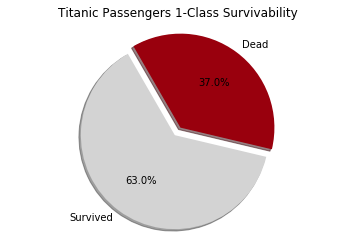

In [35]:
#Plot the graph for class1 passengers
plot_binary_pie(titanic_1class,"Titanic Passengers 1-Class Survivability","Dead",'Survived',colors[0],colors[1])


In [36]:
#The survivability for class1 is huge. On average for all classes should be 38, for class1 is 63% chance.

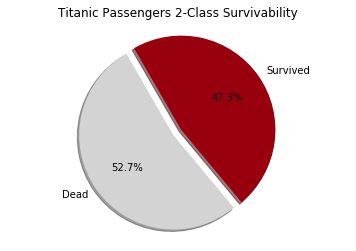

In [37]:
#Plot the graph for class2
plot_binary_pie(titanic_2class,"Titanic Passengers 2-Class Survivability","Dead",'Survived',colors[0],colors[1])

The survivability change of class2 is still higher than the average, for all classes.
Surprising. Based on that, the survivability chance of class3 will be much lower
to compensate the other two classes.

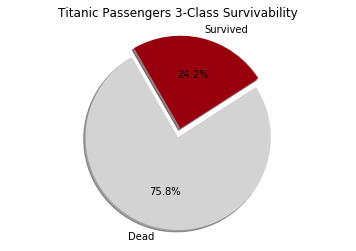

In [38]:
#Plot the graph for class3
plot_binary_pie(titanic_3class,"Titanic Passengers 3-Class Survivability","Dead",'Survived',colors[0],colors[1])

As expected, the survivability chance of class 3 is much lower than the average

Lets try to check if the female had preference during the rescue

In [39]:
#Split the data into female and male
titanic_male   = titanic.query('sex == "male"')
titanic_female = titanic.query('sex == "female"')

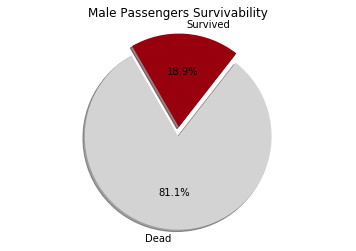

In [40]:
#Plot the graph for all Males
plot_binary_pie(titanic_male,"Male Passengers Survivability","Dead",'Survived',colors[0],colors[1])

As expected the survivability for man is much lower than average
Lets check for woman, the expected result is probably higher

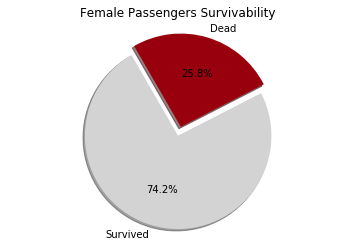

In [41]:
#Plot the graph for Female Survivability
plot_binary_pie(titanic_female,"Female Passengers Survivability","Dead",'Survived',colors[0],colors[1])

The Survivability for woman is higher, as expected. 
The previous hypothesis was that the woman and younger ones had 
priority in rescue

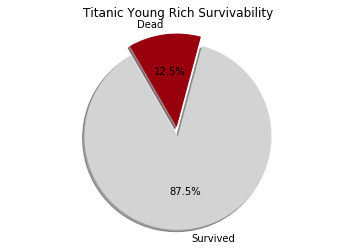

In [42]:
#Lets try to combine class1 and woman/younger ones. (Hypothesis1+ Hypothesis2)
#The hypothesis 2 is that rich people also had priority.
titanic_young_class1 = titanic_1class.query('age <= 18')
plot_binary_pie(titanic_young_class1,"Titanic Young Rich Survivability","Dead",'Survived',colors[0],colors[1])

As expected, it seems that rich people had priority. Let's check for females too

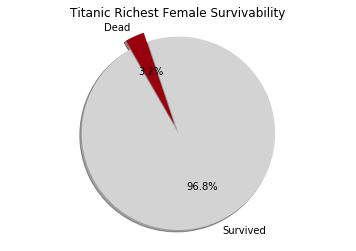

In [43]:
#Filter the date by female
titanic_female_class1 = titanic_1class.query('sex == "female"')
#Plot the char for woman from 1class
plot_binary_pie(titanic_female_class1,"Titanic Richest Female Survivability","Dead",'Survived',colors[0],colors[1])

The result for female and class1 is absolutelly huge.
From that results we can confirm that children and woman had preference in the rescue.
Also, class 1, people with more money(on average), had priority

8 - What percentage of woman survived ? What about man and children ?
<br>
Woman    : 74.2%
<br>
Man      : 18.9%
<br>
Children : 50.4%
<br>
Also, from the previous analysis
<br>
Woman in 1st class:    96.8%
<br>
Children in 1st class: 87.5%

In [44]:
#Get the values for sibsp (family relationship)
titanic['sibsp'].unique()
#For passengers who traveled alone, sibsp = 0
total_alone  = len(titanic.query('sibsp == 0'))
#For passengers who traveled with family, sibsp != 0
total_family = len(titanic.query('sibsp != 0'))

print("Total of passengers that traveled alone:{}".format(total_alone))
print("Total of passengers that traveled with family:{}".format(total_family))

Total of passengers that traveled alone:608
Total of passengers that traveled with family:283


Now we can answer the following question:
<br>
9 - How many passengers travel with family ? How many were alone ?
<br>
Total of passengers that traveled alone: 608
<br>
Total of passengers that traveled with family: 283
<br>

Now we are going to answer the last question:
10. How many passengers embarked in each port ?

In [45]:
#Get the total passengers for each embarked place
titanic['embarked'].unique()
titanic_embarked_s = len (titanic.query('embarked == "S"'))
titanic_embarked_c = len (titanic.query('embarked == "C"'))
titanic_embarked_q = len (titanic.query('embarked == "Q"'))

print("Total of passsengers that embarked at Southampton:{}".format(titanic_embarked_s))
print("Total of passsengers that embarked at Cherbourg:{}".format(titanic_embarked_c))
print("Total of passsengers that embarked at Queenstown:{}".format(titanic_embarked_q))

Total of passsengers that embarked at Southampton:644
Total of passsengers that embarked at Cherbourg:168
Total of passsengers that embarked at Queenstown:77


For the last question, we have:
<br>
10. How many passengers embarked in each port ?
<br>
Total of passsengers that embarked at Southampton:644
<br>
Total of passsengers that embarked at Cherbourg:168
<br>
Total of passsengers that embarked at Queenstown:77

# Conclusion
<br>
From our analysis we can conclude that woman and children of 1st class had priority over man and people from other classes as well. 
<br>
We also found the the youngest survivor was a baby, with around 5 months. The oldest survivor was 80 years old.
<br>
In addition, we found the the youger had a higher chance of surviving.


# Limitations
We only had data from 891 passengers and we know that the total is over 2000. Since we only have around 30% of the data, some information could be wrong from our analysis, we can't be 100% sure.
<br>
We fill the missing values in age for the mean, this could affect the survivability rates for children, adult and elderly groups. 
<br>
One possible approach would be filling the missing data keeping the proportion of the three groups.
<br>
We also ignore some columns, such as fare, name, ticket, because they were not relevant to answer the questions

# Bibliography
<br>
[1] https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
<br>
[2] https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
<br>
[3] https://en.wikipedia.org/wiki/RMS_Titanic
<br>
[4] Udacity